In [4]:
!pip install pandas==2.2.2
!pip install scikit-learn==1.5.0
!pip install seaborn==0.13.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 22.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 11.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To

# Data exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import keras
import os
from keras.preprocessing.image import load_img, img_to_array

## Init of paths, filenames

In [24]:
PATH_DATA = "../data"
images_filenames= (os.listdir(path="../data"))
images_filenames.remove("consensus")

## Images loading

In [26]:
def load_image(image_dir,filename):
    path = os.path.join(image_dir, filename)
    img = load_img(path, target_size=(512, 512))
    return img_to_array(img)

In [27]:
images = []
for filename in images_filenames:
    images.append(load_image(PATH_DATA, filename))

## Eloszlások áttekintése

Mivel az általam kiválasztott (anklealign) témának az adathalmaza képekből áll (adott felbontásban, és három csatorna), így meg kell vizsgálni a RGB-s csatornát, hogy mennyire intenzív egyes csatornán (0 és 255 között, azaz), és a képek között mennyire hasonló, különböző. Természetesen a hisztogramikus alakjait is figyelembe vesszük: Ha balra tolódik, akkor sötét, ha jobbra tolódik, akkor világos, sok fény. Az adatelemzés szempontjából azért fontos, mert a készített adathalmazom fényviszonyítási szempontja könnyen befolyásolhatja a modellek tanítását.

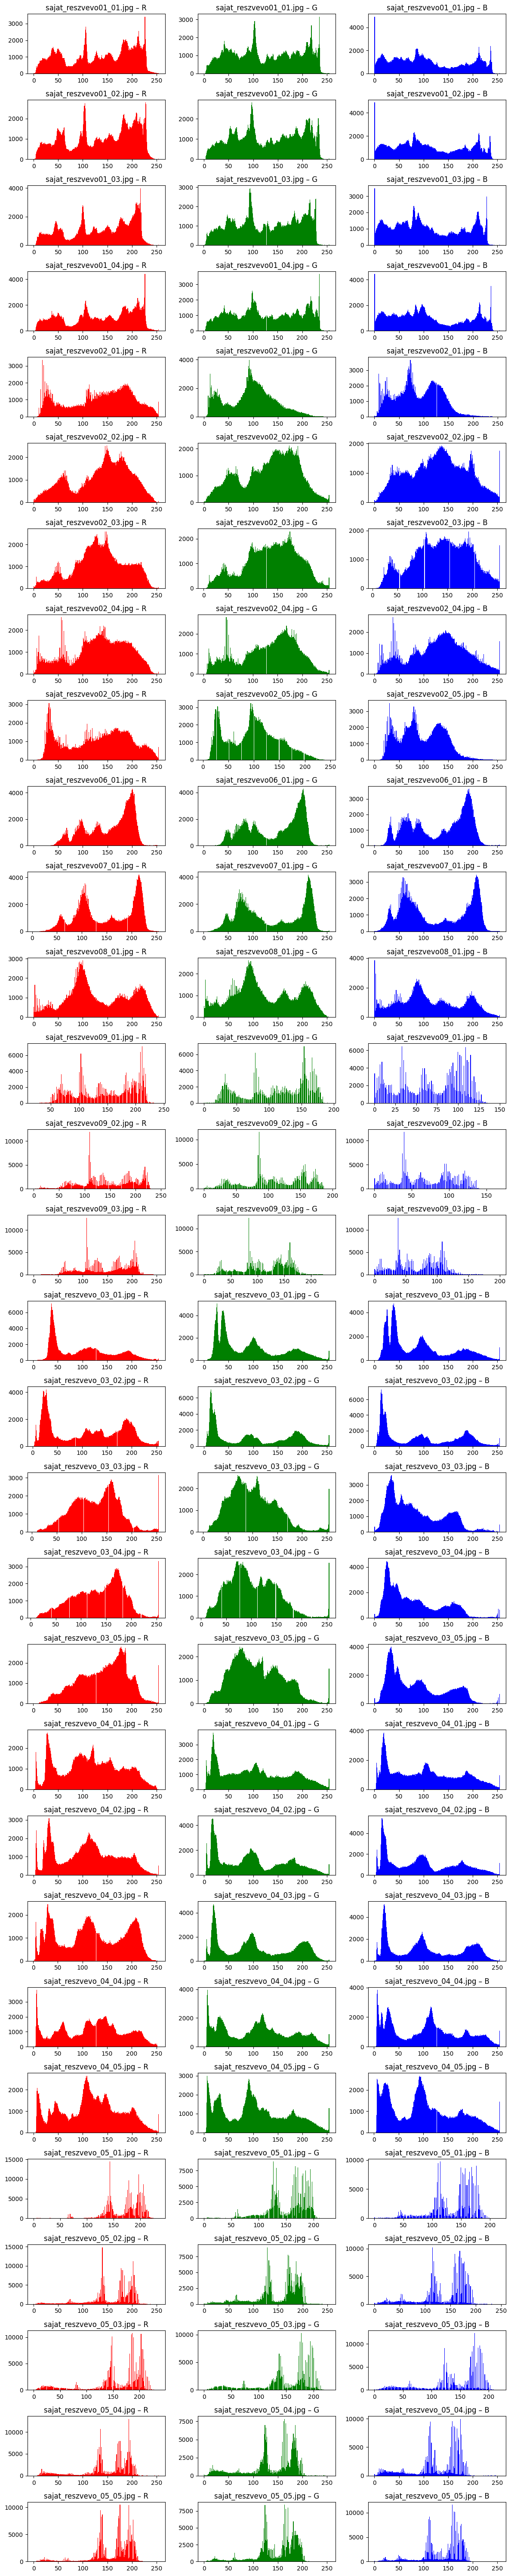

In [ ]:
import matplotlib.pyplot as plt

num_images = len(images)
fig, axes = plt.subplots(num_images, 3, figsize=(12, num_images * 2))d

for i in range(num_images):
    R = images[i][:, :, 0].flatten()
    G = images[i][:, :, 1].flatten()
    B = images[i][:, :, 2].flatten()

    # Red
    axes[i, 0].hist(R, bins=256, color='red')
    axes[i, 0].set_title(f"{images_filenames[i]} – R")

    # Green
    axes[i, 1].hist(G, bins=256, color='green')
    axes[i, 1].set_title(f"{images_filenames[i]} – G")

    # Blue
    axes[i, 2].hist(B, bins=256, color='blue')
    axes[i, 2].set_title(f"{images_filenames[i]} – B")

plt.tight_layout()
plt.show()


Következtetés, értelmezés:
- A résztvevőkhöz tartozó képek színcsatorna-eloszlásai nagyrészt konzisztensnek mutatkoznak. A hisztogramok formája csak minimális eltérést mutat az egyes képek között, ami arra utal, hogy a képek hasonló fényviszonyok, expozíció és színkompozíció mellett készültek. A legjelentősebb anomáliák az 5. résztvevő esetében figyelhetők meg.

- Az 5. résztvevő képeinek hisztogramjain tüskeszerű, zajra utaló csúcsok jelennek meg mindhárom (R/G/B) csatornán. Ezek az intenzitásértékek szokatlanul szétszórtak, nem követik a természetes képekre jellemző sima, dombszerű eloszlást. Ilyen mintázat rendszerint zajos, rossz minőségű vagy eltérő módon feldolgozott képet jelez.

- Gépi tanulási szempontból ezek az anomáliák potenciális kockázatot jelentenek. A modellek hajlamosak a kiugró, extrém intenzitású mintákat megtanulni, ami az általánosítási képesség romlását okozhatja. Ha a tréningadatok tartalmaznak ilyen anomáliákat, akkor a modell túlilleszkedhet rájuk, ami gyengébb teljesítményt eredményezhet új, tisztább vagy átlagos minőségű képeken

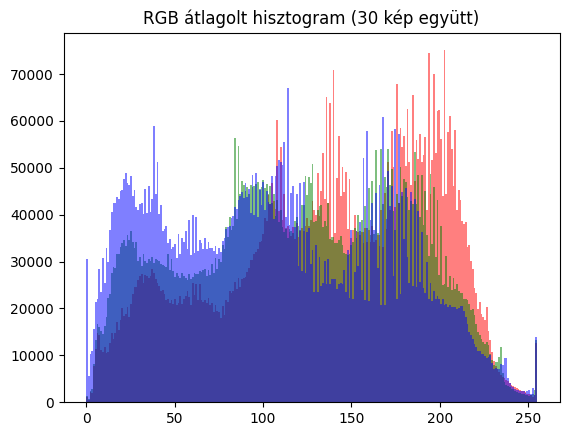

In [96]:
import numpy as np
import matplotlib.pyplot as plt

all_R = np.concatenate([img[:, :, 0].flatten() for img in images])
all_G = np.concatenate([img[:, :, 1].flatten() for img in images])
all_B = np.concatenate([img[:, :, 2].flatten() for img in images])

plt.hist(all_R, bins=256, alpha=0.5, color='red')
plt.hist(all_G, bins=256, alpha=0.5, color='green')
plt.hist(all_B, bins=256, alpha=0.5, color='blue')
plt.title("RGB átlagolt hisztogram (30 kép együtt)")
plt.show()

Az adatok elemzése mellett a címkéket is elemeztem, annak eredményét az 02-label-analysis.ipynb fájlban található.